<div style="overflow:auto;">
    <div style="float:left; margin-right:10px;">
        <img width='120' height='120' src='https://cityme.novaims.unl.pt/images/footer/novaims.png'>
    </div>
    <div>
        <h4>This analysis is conducted as part of the "Business Cases with Data Science" course, a component of the Master's program in Data Science and Advanced Analytics at the Nova Information Management School.</h4>  
        <h1 style="background-color: SeaGreen; color: white; display: inline-block;"><b>Business Cases with Data Science Case 2: Monthly Sales Forecast</b></h1>
    </div>
</div>

***
### Business Understanding and Data Understanding Notebook

Group V 2023/2024: 
- Catarina Nunes, 20230083
</div> 
***

In [ ]:
# pip list

In [ ]:
# !pip install numpy==1.24.3
# !pip install pandas==1.5.3
# !pip install matplotlib==3.7.1
# !pip install seaborn==0.12.2 
# !pip install scipy==1.10.1   
# !pip install scikit-learn==1.3.0 
# !pip install missingno==0.5.2 
# !pip install plotly==5.18.0  


# pip install lazypredict
# pip install sktime
# pip install skforecast

In [1]:
import pandas as pd

In [4]:
pip install lazypredict


  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Using cached xgboost-2.0.3-py3-none-win_am

In [5]:
from lazypredict.Supervised import LazyRegressor

## Loading the Dataframes and optimizing the datatypes
Since we decided to separate the notebooks, we are going to optimize the data types right now.

In [8]:
# load sales_df.csv
sales_df = pd.read_csv(r'Business case 2/sales_df.csv', index_col=0)
sales_df.head(1)

,P1,P11,P6,P8,P12,P16,P4,P5,P3,P9,P14,P13,P20,P36,Sales_EUR
Year-Month,,,,,,,,,,,,,,,
2018-10,36098918.79,1021303.50,369231.60,586052.74,28686.33,333196.87,397760.69,2499061.19,8089465.96,3219.32,5770.00,27666.10,4563.14,6474.60,50779714.40


In [9]:
sales_df.shape

(43, 15)

In [10]:
# load sales_df.csv
final_df_lag = pd.read_csv(r'Business case 2/final_df_lag.csv', index_col=0)
final_df_lag.index.name = 'Year-Month'
final_df_lag.head(1)

,CHN_M&E_Prod,CHN_M&E_Ship,FRA_M&E_Prod,FRA_M&E_Ship,DEU_M&E_Prod,DEU_M&E_Ship,ITA_M&E_Prod,ITA_M&E_Ship,JPN_M&E_Prod,JPN_M&E_Ship,...,SIESTOCK_%VAR lag3,SIESTOCK_%VAR lag4,SIESTOCK_%VAR lag5,SIESTOCK_%VAR lag6,SIESTOCK_%VAR lag7,SIESTOCK_%VAR lag8,SIESTOCK_%VAR lag9,SIESTOCK_%VAR lag10,SIESTOCK_%VAR lag11,SIESTOCK_%VAR lag12
Year-Month,,,,,,,,,,,,,,,,,,,,,
2018-10,212,212,108,122,124,138,118,122,125,125,...,0.07,0.02,0.06,0.02,-0.05,-0.11,0.05,0.02,-0.07,0.03


In [11]:
final_df_lag.shape

(43, 1287)

In [12]:
# float64 to float32
float_cols = sales_df.select_dtypes(include=['float64']).columns
sales_df[float_cols] = sales_df[float_cols].astype('float32')

# sales_df.dtypes
# sales_df.info() (-3Kb de memória)

In [13]:
# float64 to float32
float_cols = final_df_lag.select_dtypes(include=['float64']).columns
final_df_lag[float_cols] = final_df_lag[float_cols].astype('float32')

# int64 to int32
int_cols = final_df_lag.select_dtypes(include=['int64']).columns
final_df_lag[int_cols] = final_df_lag[int_cols].astype('int32')

#memory usage: from 432.7+ KB to 216.5+ KB

<a id = "Data-Modeling"></a>
    
## Data Modeling: Products Forecast
 
 - [P1 Forecast](#P1)
 - [P3 Forecast](#P3)
 - [P4 Forecast](#P4)
 - [P5 Forecast](#P5)
 - [P6 Forecast](#P6)
 - [P8 Forecast](#P8)
 - [P9 Forecast](#P9)
 - [P11 Forecast](#P11)
 - [P12 Forecast](#P12)
 - [P13 Forecast](#P13)
 - [P14 Forecast](#P14)
 - [P16 Forecast](#P16)
 - [P20 Forecast](#P20)
 - [P36 Forecast](#P20)
 
[Back to Index](#Index)

To facilitate a more efficient workflow, we've refined the functions below by dividing the steps for the forecasting modeling:

In [291]:
index = pd.period_range(start='2018-10', end='2023-02', freq='M')

# Crie o DataFrame com o índice especificado
df_pred_final = pd.DataFrame(index=index)

In [14]:
def preprocess_data(df):
    # function used for data scaling
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    final_df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
    return final_df_scaled, scaler

In [15]:
def calculate_rmse_df(df, target):
    rmse_scores = {}
    for column in df.columns:
        rmse = sqrt(mean_squared_error(target, df[column]))
        rmse_scores[column] = rmse
    rmse_df = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=['RMSE'])
    rmse_df_sorted = rmse_df.sort_values(by='RMSE', ascending=True)
    drop_col = list(rmse_df[rmse_df['RMSE'] > Thershold].index)
    df.drop(drop_col, axis=1, inplace=True)
    
    return rmse_df.sort_values(by='RMSE', ascending=True)

In [16]:
def combo_selection(df, max_selection_size=5):
    # Create a list of all columns in final_df except for the last one (the target column)
    variables = df.columns.tolist()[:-1]

    # Create an empty list to store all possible selections of features
    all_selections = []

    # Loop through all possible selection sizes from 1 to max_selection_size
    for selection_size in range(1, max_selection_size+1):
        # Loop through all possible combinations of variables of size selection_size
        # and append them to the all_selections list
        for selection in itertools.combinations(variables, selection_size):
            all_selections.append(list(selection))

    # Print the total number of iterations
    selections_number = len(all_selections)
    print("Total number of iterations:", selections_number)

    # Return the list of all possible feature combinations
    return all_selections, selections_number

In [17]:
def run_feature_selection(df, feature_combos):

    rmse = []
    index = []

    # Initialize a counter variable to track progress
    i = 0

    # Record the start time for the loop
    start_time = time.time()

    # Loop through each feature combination
    for combo in feature_combos:
        X = df[combo]['2019-12':] #test with 2019-10: 0.5; test with 2019-11: 0.45; test with 2020-01-0.43
        
        # Create the target variable
        y = df['Target']['2019-12':]
        
        # Set the number of months to forecast
        months_forecast = 10
        
        # Split the data into training and testing sets
        y_train = y[:-months_forecast]
        y_test = y[-months_forecast:]
        X_train = X[:-months_forecast]
        X_test = X[-months_forecast:]
        
        # Reshape the input data to a 3-dimensional shape
        X_train_array = X_train.to_numpy().reshape(-1, 1, X_train.shape[1])
        X_test_array = X_test.to_numpy().reshape(-1, 1, X_test.shape[1])

        # Increment the progress counter
        i += 1
        
        # Fit several regression models using the LazyRegressor library
        clf = LazyRegressor(verbose=0)
        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        
        # Select the two best-performing models based on RMSE
        top_dogs = models.sort_values('RMSE').iloc[:2]
        model_1 = top_dogs.index[0]
        model_2 = top_dogs.index[1]
        score_1 = top_dogs['RMSE'].values[0]
        score_2 = top_dogs['RMSE'].values[1]
        
        # Store the RMSE scores and model indices in the appropriate lists
        rmse.append(score_1)
        rmse.append(score_2)
        index.append(str(combo)+model_1)
        index.append(str(combo)+model_2)
        
        # Print progress and wait 0.5 seconds before continuing
        print(f'Progress:', round((i/selections_number)*100,2),'%', end='\r')
        time.sleep(0.5)
        
    end_time = time.time()
    print(f"\nTime elapsed: {end_time - start_time:.2f} seconds")
    
    return rmse, index

In [18]:
def build_model_predictions(models, df, combo_list, months_forecast):

    plot_df = pd.DataFrame(df['Target'])
    
    for i, model in enumerate(models, start=1):
        X = df[combo_list[i-1]]
        y = df['Target']
        y_train = y[:-months_forecast]
        y_test = y[-months_forecast:]
        X_train = X[:-months_forecast]
        X_test = X[-months_forecast:]

        model.fit(X_train['2019-12':], y_train['2019-12':])
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        preds = list(y_pred_train) + list(y_pred_test)
        plot_df[f'test{i}'] = preds
        
    return plot_df

In [300]:
def make_predictions(df, model, steps, start_date, target_mean, target_var, combo_list):
    # Create a list called features containing the column names to be used from df
    features = list(combo_list)

    # Add the string 'Target' to the end of features
    features.append('Target')

    # Select only the columns in df that have the same names as those in features and store the resulting DataFrame in forecast_df
    forecast_df = df[features]

    # Create and fit a multi-series forecaster using model and a lag of 10 periods
    forecaster = ForecasterAutoregMultiSeries(
                     regressor          = model,
                     lags               = 10,
                     transformer_series = None,
                     transformer_exog   = None
                 )
    
    forecaster.fit(series=forecast_df)

    # Predict future values for the time series
    predictions = forecaster.predict(steps=steps)

    # Create a new index of dates for the predicted values
    new_index = pd.date_range(start=start_date, periods=len(predictions), freq='M').strftime('%Y-%m')
    predictions.index = new_index

    # Concatenate the original DataFrame and the predicted values into a single DataFrame
    pred_df_p = pd.concat([forecast_df, predictions])

    # Reverse scale the column
    unscaled_col = (pred_df_p['Target'].values * np.sqrt(target_var)) + target_mean

    # Add the unscaled column as a new column in pred_df_p
    pred_df_p['target_unscaled'] = unscaled_col

    # Round the unscaled predictions to 2 decimal places
    pred_df_p['target_unscaled'] = round(pred_df_p['target_unscaled'], 2)

    # Plot the unscaled predicted values
    fig = px.line(pred_df_p, x=pred_df_p.index, y='target_unscaled')

    # Vertical line marking the beginning of the forecast period
    fig.add_shape(
        type='line',
        x0=start_date, y0=0, x1=start_date, y1=1,
        line=dict(color='red', width=2, dash='dash'),
        xref='x',
        yref='paper'  
    )

    fig.show()
    
    return pd.DataFrame(pred_df_p['target_unscaled'], columns=['target_unscaled'])

<a id = "P1"></a>

### P1 Forecast

[Back to Data Modeling](#Data-Modeling)

In [ ]:
#pip install skforecast
#pip install example_module

In [616]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
import time
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from sklearn.linear_model import RANSACRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars

#### 1. Defining our target 

In [391]:
final_df_lag['Target'] = sales_df['P1']

In [392]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product1 = final_df_lag['Target'].mean()
target_var_product1 = final_df_lag['Target'].var()

In [393]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [394]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [306]:
Thershold = 1.08

In [307]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
GBR_Prod_Index_Elect lag1,0.93
CHN_M&E_Ship lag4,1.03
CHN_M&E_Prod lag4,1.03
DEU_Prod_Index_Elect lag1,1.06
ITA_M&E_Ship lag10,1.07
SIESTOCK_%VAR lag11,1.07
GBR_M&E_Prod lag1,1.07


We determine the threshold by examining the results, aiming for a value that utilizes around 5 to 6 variables without being excessively large (significantly greater than 1) for use in combinations.

In [308]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 119


In [ ]:
# rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [45]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['ITA_M&E_Ship lag10', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1']AdaBoostRegressor",0.45
"['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1']AdaBoostRegressor",0.47
"['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1']AdaBoostRegressor",0.48
"['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1']ExtraTreesRegressor",0.48
"['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'DEU_Prod_Index_Elect lag1']DecisionTreeRegressor",0.49


#### We now use the results above to select the varible combination and the correspondent model 

In [395]:
combo_list = [['ITA_M&E_Ship lag10', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1'],
              ['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1'],
              ['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1'],
              ['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1', 'DEU_Prod_Index_Elect lag1'],
              ['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'DEU_Prod_Index_Elect lag1']]

In [396]:
# we change the model acording to the test_results
model1 = AdaBoostRegressor()
model2 = AdaBoostRegressor()
model3 = AdaBoostRegressor()
model4 = AdaBoostRegressor()
model5 = DecisionTreeRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [397]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

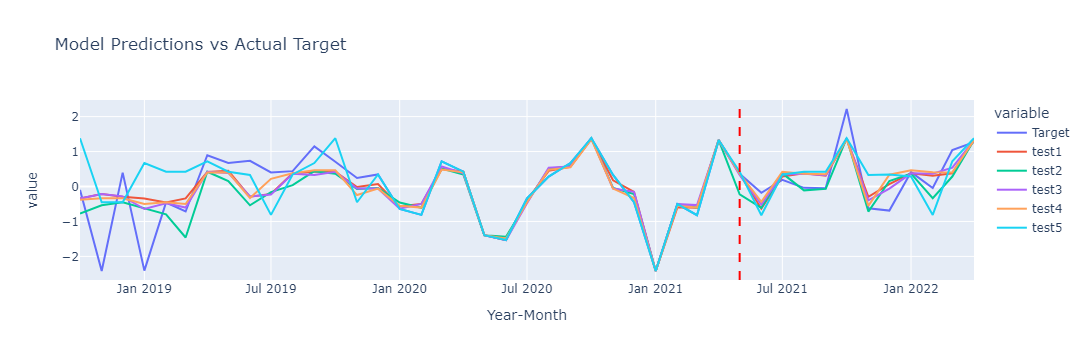

In [312]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- In our analysis, we conducted a lot of tests: test overfitting. Overfitting occurs when a model learns noise present in the training data rather than the underlying pattern, potentially leading to poor generalization on unseen data. This could pose significant challenges, as it may result in inflated performance metrics during training but poor performance when applied to new data. To address this, simplifying the approach and eliminating redundant data show up as essential. 

- By doing so, we reach `Test 2' as the best one for P1`, althoug its has a more moderate nature compared to the target variable, it has a good performance (keeps up with the movement) during the forecast phase.

- Among the models evaluated, the `AdaBoostRegressor()` emerged as the top-performing predictive multivariate model. AdaBoostRegressor is a boosting ensemble method that combines multiple weak learners, typically decision trees, to create a strong learner. It sequentially trains each weak learner, adjusting the weights of training instances based on the performance of the preceding learners. This process allows AdaBoostRegressor to focus on the observations that are difficult to classify, ultimately improving the model's predictive accuracy.

The feature selection of the model included:
- `['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1']`

#### Forecast P1: 10 months

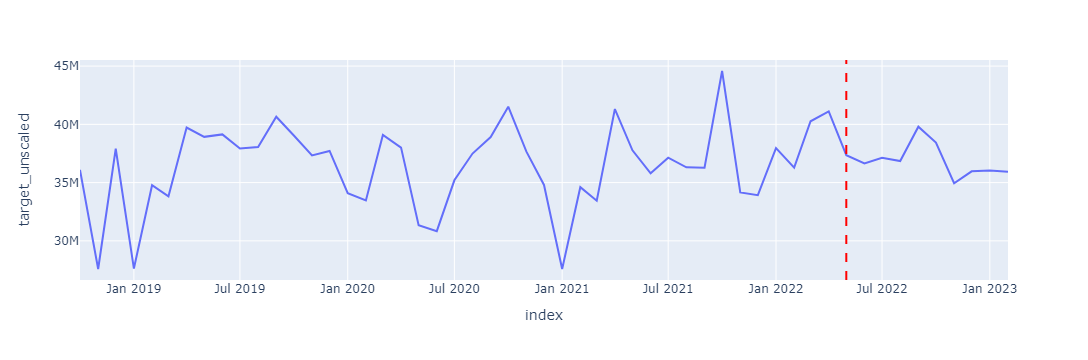

In [398]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model1,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product1,
                 target_var=target_var_product1,
                 combo_list=combo_list[0])

In [399]:
df_pred_final = target_unscaled_values
df_pred_final1 = df_pred_final.rename(columns={'target_unscaled': 'P1'})

<a id = "P3"></a>

### P3 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [316]:
final_df_lag['Target'] = sales_df['P3']

In [317]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product3 = final_df_lag['Target'].mean()
target_var_product3 = final_df_lag['Target'].var()

In [318]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [319]:
forecast_df, scaler = preprocess_data(forecast_df)

In [320]:
Thershold = 1.005

#### 3. Variable & Model selection

In [321]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_M&E_Ship lag11,0.94
CHN_M&E_Prod lag11,0.94
GBR_Prod_Index_Elect lag8,0.99
INR/EUR lag11,0.99
WLD_Prod_Index_Elect,0.99
SIESTOCK_%VAR lag10,1.00


In [84]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 62


In [ ]:
# rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [86]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['CHN_M&E_Prod lag11', 'CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10']RANSACRegressor",0.55
"['CHN_M&E_Prod lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10']RANSACRegressor",0.58
"['CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10']RANSACRegressor",0.58
"['WLD_Prod_Index_Elect', 'CHN_M&E_Prod lag11', 'GBR_Prod_Index_Elect lag8']RANSACRegressor",0.60
"['WLD_Prod_Index_Elect', 'CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8']RANSACRegressor",0.60


In [322]:
combo_list = [['CHN_M&E_Prod lag11', 'CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10'],
              ['CHN_M&E_Prod lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10'],
              ['CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8', 'SIESTOCK_%VAR lag10'],
              ['WLD_Prod_Index_Elect', 'CHN_M&E_Prod lag11', 'GBR_Prod_Index_Elect lag8'],
              ['WLD_Prod_Index_Elect', 'CHN_M&E_Ship lag11', 'GBR_Prod_Index_Elect lag8']]

In [323]:
# we change the model acording to the test_results
model1 = RANSACRegressor()
model2 = RANSACRegressor()
model3 = RANSACRegressor()
model4 = RANSACRegressor()
model5 = RANSACRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [324]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

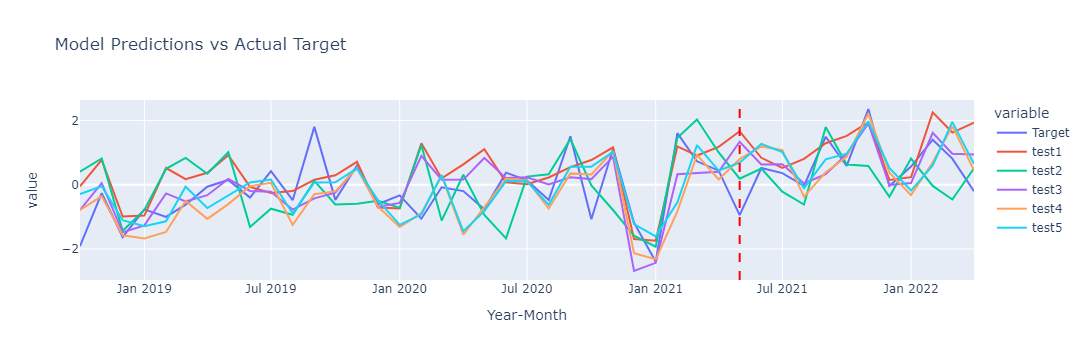

In [325]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- Tests 4 and 5 are similiar and the best one for P3. The combo variable/model is the same, but we will use `Test 4` because it is more moderate and accompanies the shape/mode swing during the forecast test. Additionally, we choose this one because it does not overfit on the training data.

- Among the evaluated models, the `RANSACRegressor()` emerged as the top-performing predictive multivariate model. RANSACRegressor is a robust regression algorithm that is particularly useful when the dataset contains outliers or noise. Given that P3 exhibits some problematic spikes, even though we treated the outliers during preparation, RANSACRegressor proves to be a suitable choice.

The feature selection of the model included:

- `['WLD_Prod_Index_Elect', 'CHN_M&E_Prod lag11', 'GBR_Prod_Index_Elect lag8']`

#### Forecast P3: 10 months

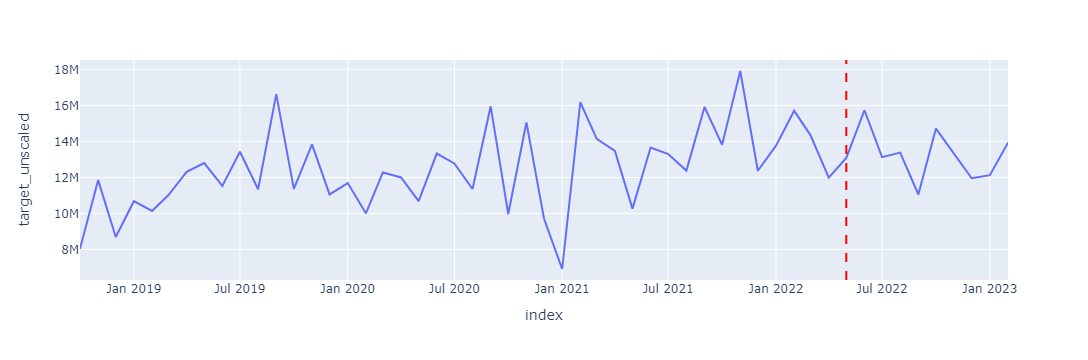

In [338]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model4,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product3,
                 target_var=target_var_product3,
                 combo_list=combo_list[3])

In [339]:
df_pred_final = target_unscaled_values
df_pred_final3 = df_pred_final.rename(columns={'target_unscaled': 'P3'})

<a id = "P4"></a>

### P4 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [340]:
final_df_lag['Target'] = sales_df['P4']

In [341]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product4 = final_df_lag['Target'].mean()
target_var_product4 = final_df_lag['Target'].var()

In [342]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [343]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [118]:
Thershold = 1.145

In [119]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
HKD/EUR lag1,1.05
USD/EUR lag1,1.07
SIESTOCK_%VAR lag10,1.13
USA_Unemployment_Rate lag10,1.13
HKD/EUR lag2,1.14
CNY/EUR lag6,1.14
ITA_Prod_Index_Elect,1.14


In [120]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 119


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [122]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1', 'USD/EUR lag1']SVR",0.32
"['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1']SVR",0.32
"['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'USD/EUR lag1']SVR",0.32
"['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1', 'HKD/EUR lag2', 'USD/EUR lag1']SVR",0.34
"['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag2', 'USD/EUR lag1']SVR",0.34


In [344]:
combo_list = [['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1', 'USD/EUR lag1'],
              ['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1'],
              ['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'USD/EUR lag1'],
              ['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1', 'HKD/EUR lag2', 'USD/EUR lag1'],
              ['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag2', 'USD/EUR lag1']]

In [345]:
# we change the model acording to the test_results
model1 = SVR()
model2 = SVR()
model3 = SVR()
model4 = SVR()
model5 = SVR()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [346]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

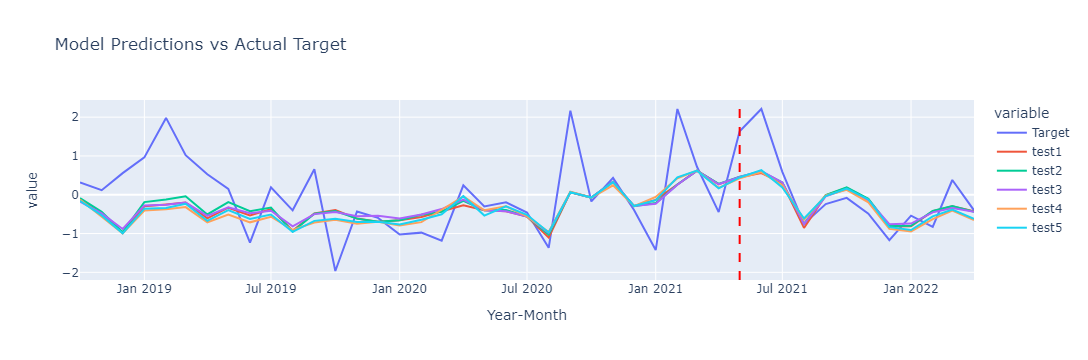

In [128]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- Tests 2 and 3 are similar to each other the same and performed the best for P4. We are going to use test 2. The combination of variables and the model remains consistent across both tests. These tests were able to follow the general shape of the curve, although they are not perfect and do not exhibit signs of overfitting.

- Among the evaluated models, only the `SVR()` emerged as the tested model. SVR, which stands for Support Vector Regression, is a technique used for regression tasks. It works by fitting a hyperplane in a high-dimensional space to minimize the error between the actual and predicted values.

The feature selection of the model included:

- `['ITA_Prod_Index_Elect', 'CNY/EUR lag6', 'HKD/EUR lag1']`

#### Forecast P4: 10 months

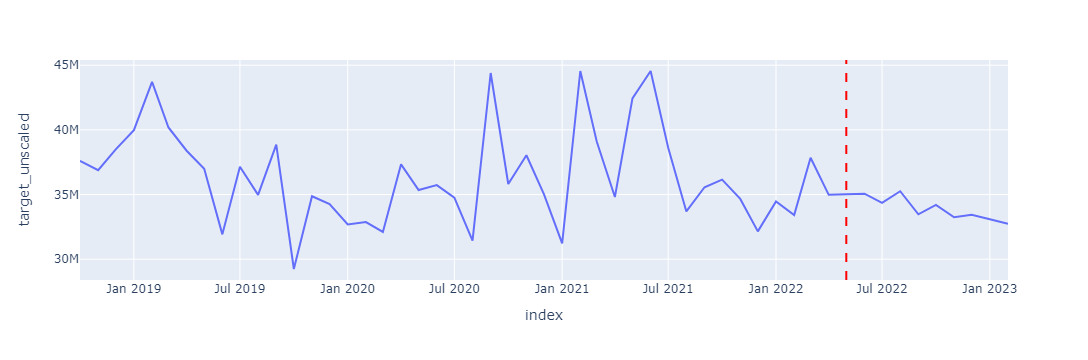

In [347]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model2,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product1,
                 target_var=target_var_product1,
                 combo_list=combo_list[1])

In [348]:
df_pred_final = target_unscaled_values
df_pred_final4 = df_pred_final.rename(columns={'target_unscaled': 'P4'})

<a id = "P5"></a>

### P5 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [352]:
final_df_lag['Target'] = sales_df['P5']

In [353]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product5 = final_df_lag['Target'].mean()
target_var_product5 = final_df_lag['Target'].var()

In [354]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [355]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [138]:
Thershold = 1.14

In [139]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_M&E_Prod lag3,1.09
CHN_M&E_Ship lag3,1.09
WLD_Prod_Index_Elect lag11,1.11
EU_M&E_Ship lag9,1.11
GBR_Prod_Index_Elect lag6,1.14


In [140]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [343]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [142]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['CHN_M&E_Prod lag3', 'WLD_Prod_Index_Elect lag11']SVR",0.73
"['CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11']SVR",0.73
"['CHN_M&E_Prod lag3', 'CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11']SVR",0.73
"['CHN_M&E_Prod lag3', 'WLD_Prod_Index_Elect lag11']KNeighborsRegressor",0.75
"['CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11']KNeighborsRegressor",0.75


In [356]:
combo_list = [['CHN_M&E_Prod lag3', 'WLD_Prod_Index_Elect lag11'],
              ['CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11'],
              ['CHN_M&E_Prod lag3', 'CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11'],
              ['CHN_M&E_Prod lag3', 'WLD_Prod_Index_Elect lag11'],
              ['CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11']]

In [357]:
# we change the model acording to the test_results
model1 = SVR()
model2 = SVR()
model3 = SVR()
model4 = KNeighborsRegressor()
model5 = KNeighborsRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [358]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

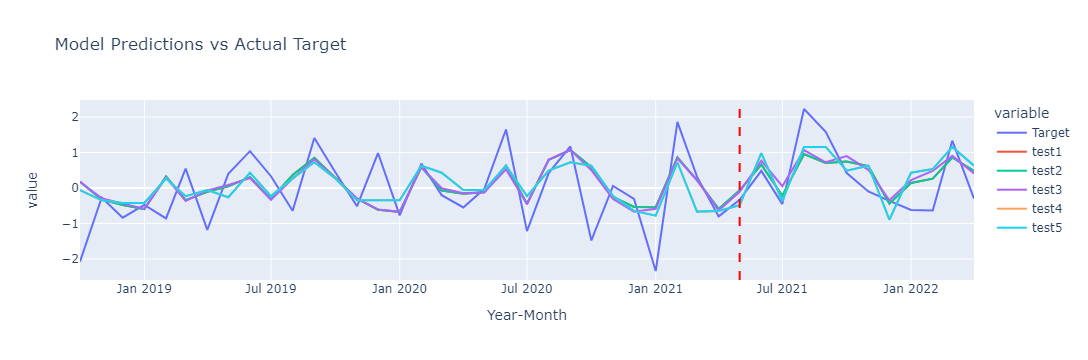

In [148]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- Tests 1 and 2 are essentially the same and performed the best for P5. The combination of variables and the model remains consistent across both tests. These tests were able to follow the general shape of the curve, although they are not perfect and do not exhibit signs of overfitting.

- Among the evaluated models, only the `SVR()` emerged as the best model. SVR, which stands for Support Vector Regression, is a technique used for regression tasks. It works by fitting a hyperplane in a high-dimensional space to minimize the error between the actual and predicted values.

The feature selection of the model included:

- `['CHN_M&E_Ship lag3', 'WLD_Prod_Index_Elect lag11']`

#### Forecast P5: 10 months

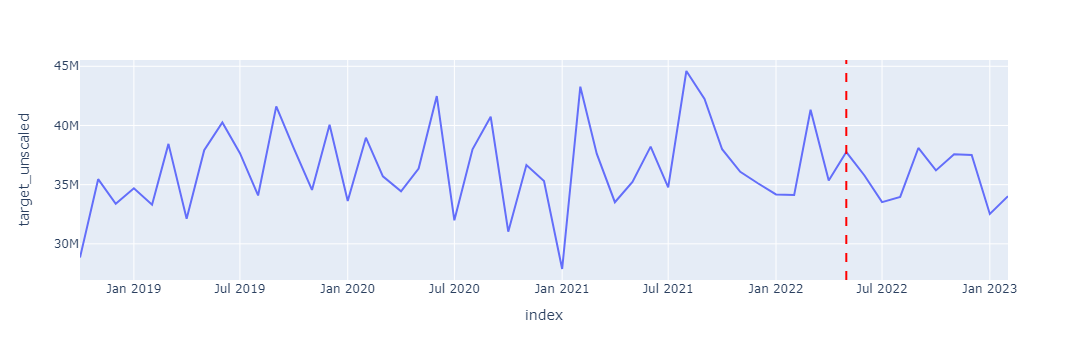

In [359]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model1,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product1,
                 target_var=target_var_product1,
                 combo_list=combo_list[0])

In [360]:
df_pred_final = target_unscaled_values
df_pred_final5 = df_pred_final.rename(columns={'target_unscaled': 'P5'})

<a id = "P6"></a>

### P6 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [361]:
final_df_lag['Target'] = sales_df['P6']

In [362]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product6 = final_df_lag['Target'].mean()
target_var_product6 = final_df_lag['Target'].var()

In [363]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [364]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [154]:
Thershold = 1.155

In [155]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_IR lag6,1.10
JPN_Prod_Index_Elect lag5,1.12
CHN_IR lag7,1.12
FRA_Prod_Index_M&E lag5,1.13
FRA_M&E_Prod lag5,1.14
USA_CConfidence lag5,1.14
DEU_Prod_Index_M&E lag9,1.15


In [156]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 119


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [159]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['DEU_Prod_Index_M&E lag9', 'CHN_IR lag6', 'CHN_IR lag7', 'USA_CConfidence lag5']XGBRegressor",0.49
"['FRA_M&E_Prod lag5', 'CHN_IR lag6']BaggingRegressor",0.59
"['FRA_M&E_Prod lag5', 'CHN_IR lag6', 'CHN_IR lag7']BaggingRegressor",0.62
"['FRA_M&E_Prod lag5', 'CHN_IR lag6', 'CHN_IR lag7']PassiveAggressiveRegressor",0.65
"['DEU_Prod_Index_M&E lag9', 'CHN_IR lag6', 'CHN_IR lag7', 'USA_CConfidence lag5']AdaBoostRegressor",0.65


In [365]:
combo_list = [['DEU_Prod_Index_M&E lag9', 'CHN_IR lag6', 'CHN_IR lag7', 'USA_CConfidence lag5'],
              ['FRA_M&E_Prod lag5', 'CHN_IR lag6'],
              ['FRA_M&E_Prod lag5', 'CHN_IR lag6', 'CHN_IR lag7'],
              ['FRA_M&E_Prod lag5', 'CHN_IR lag6', 'CHN_IR lag7'],
              ['DEU_Prod_Index_M&E lag9', 'CHN_IR lag6', 'CHN_IR lag7', 'USA_CConfidence lag5']]

In [366]:
# we change the model acording to the test_results
model1 = XGBRegressor()
model2 = BaggingRegressor()
model3 = BaggingRegressor()
model4 = PassiveAggressiveRegressor()
model5 = AdaBoostRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [367]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

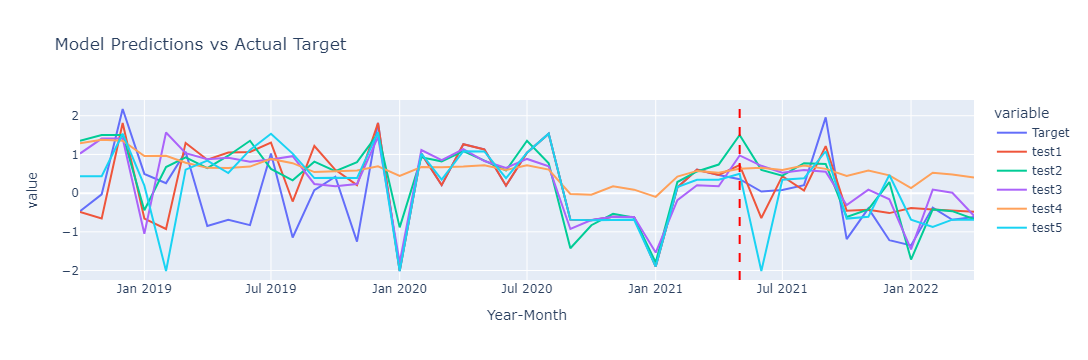

In [169]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- In this analysis we will have to be very careful with overfitting. Overfitting occurs when a model learns noise present in the training data rather than the underlying pattern, potentially leading to poor generalization on unseen data. This could pose significant challenges, as it may result in inflated performance metrics during training but poor performance when applied to new data. To address this, simplifying the approach and eliminating redundant data show up as essential. 

- All the tests made are prone to overfit being the `Test 3` the one that gives more guarantees of achieving more moderate results performing better in forecast
- The `BaggingRegressor()` is the most robust predictive model due to it's abblity to reduce overfitting and enhanced generalization. BaggingRegressor is an ensemble learning method that aggregates predictions from multiple estimators to improve stability and accuracy. It uses bootstrap sampling to train each base estimator on different subsets of the training data.

The feature selection of the model included:
- `['FRA_M&E_Prod lag5', 'CHN_IR lag6', 'CHN_IR lag7']`

#### Forecast P6: 10 months

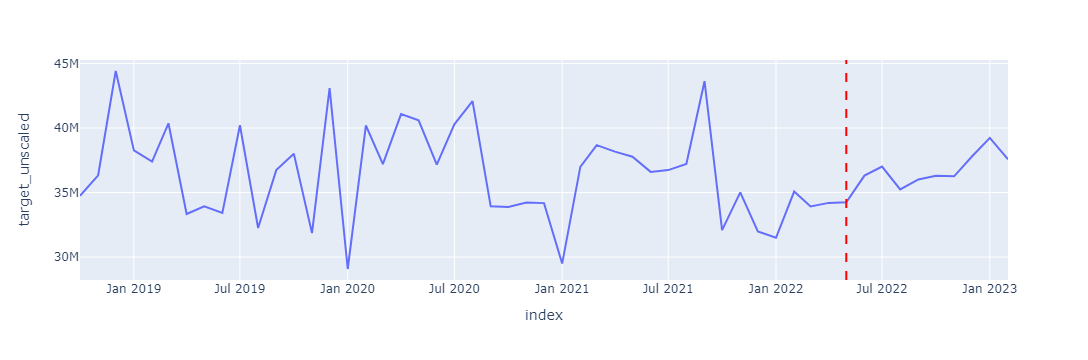

In [372]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product1,
                 target_var=target_var_product1,
                 combo_list=combo_list[2])

In [373]:
df_pred_final = target_unscaled_values
df_pred_final6 = df_pred_final.rename(columns={'target_unscaled': 'P6'})

<a id = "P8"></a>

### P8 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [374]:
final_df_lag['Target'] = sales_df['P8']

In [375]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product8 = final_df_lag['Target'].mean()
target_var_product8 = final_df_lag['Target'].var()

#### 2. Applying the First function: Data Scaling

In [376]:
forecast_df = final_df_lag.copy()

#### 3. Variable & Model selection

In [377]:
forecast_df, scaler = preprocess_data(forecast_df)

In [176]:
Thershold = 0.79

In [177]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_M&E_Ship lag9,0.77
CHN_M&E_Prod lag9,0.77
OCDE(EU)_CPI lag4,0.78
DEU_Producer_Prices_Elect lag4,0.78
WLD_P_Minerals lag2,0.78
SAU_CPI lag1,0.79
FRA_CPI lag1,0.79


In [178]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 119


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [180]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'OCDE(EU)_CPI lag4']MLPRegressor",0.63
"['CHN_M&E_Ship lag9', 'DEU_Producer_Prices_Elect lag4', 'FRA_CPI lag1', 'SAU_CPI lag1']MLPRegressor",0.65
"['CHN_M&E_Prod lag9', 'DEU_Producer_Prices_Elect lag4', 'FRA_CPI lag1', 'SAU_CPI lag1']MLPRegressor",0.65
"['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'FRA_CPI lag1', 'SAU_CPI lag1']MLPRegressor",0.65
"['CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'FRA_CPI lag1', 'SAU_CPI lag1']MLPRegressor",0.68


In [378]:
combo_list = [['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'OCDE(EU)_CPI lag4'],
              ['CHN_M&E_Ship lag9', 'DEU_Producer_Prices_Elect lag4', 'FRA_CPI lag1', 'SAU_CPI lag1'],
              ['CHN_M&E_Prod lag9', 'DEU_Producer_Prices_Elect lag4', 'FRA_CPI lag1', 'SAU_CPI lag1'],
              ['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'FRA_CPI lag1', 'SAU_CPI lag1'],
              ['CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'FRA_CPI lag1', 'SAU_CPI lag1']]

In [379]:
# we change the model acording to the test_results
model1 = MLPRegressor()
model2 = MLPRegressor()
model3 = MLPRegressor()
model4 = MLPRegressor()
model5 = MLPRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [380]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

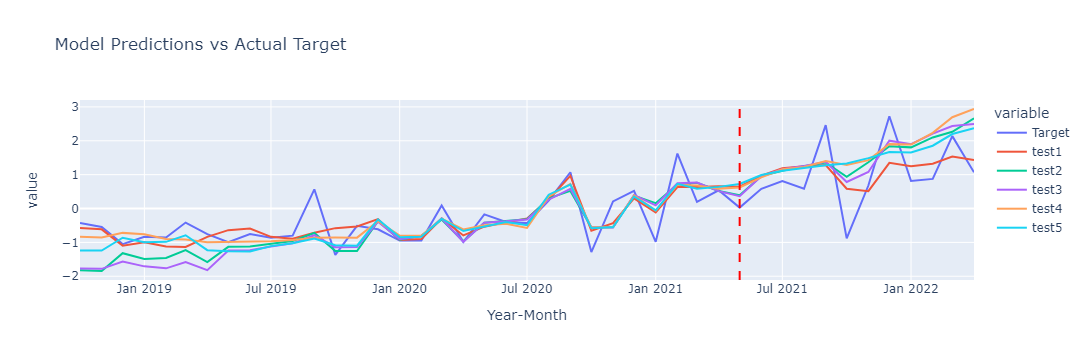

In [186]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- In this case we are confronted with a target variable that shows some big variations which will difficult in the choice of models. On one hand we have `Test 1` presenting a conservative solution that follows the variations and inclination trend while being moderate and on the other hand we have `Test 2` presenting a more agressive solution. For that matter we will choose `Test 1`, the best performance during forecast.  
 
- The `MLPRegressor()` emerged as the top-performing predictive multivariate model. MLPRegressor is a neural network for regression tasks. It utilizes multiple layers of nodes to learn patterns in data. It optimizes weights via backpropagation, refining predictions through hidden layers and activation functions and it's also effective to capture nonlinear relationships in large datasets.

The feature selection of the model included:
- `['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'WLD_P_Minerals lag2', 'OCDE(EU)_CPI lag4']`

#### Forecast P8: 10 months

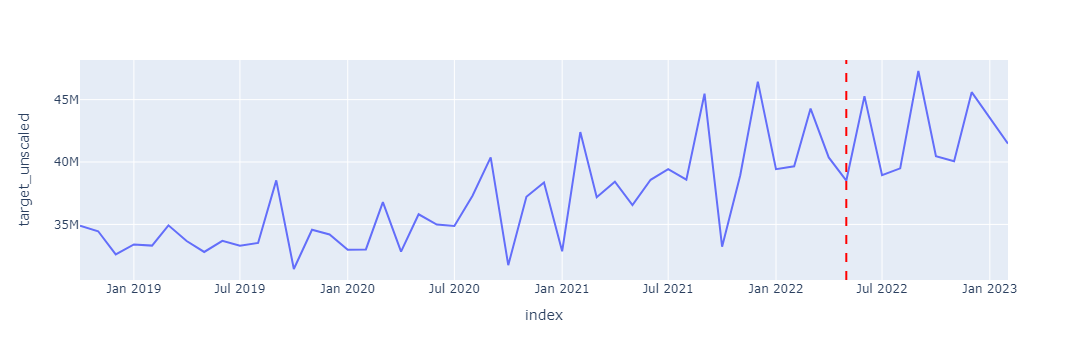

In [382]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model1,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product1,
                 target_var=target_var_product1,
                 combo_list=combo_list[0])

In [383]:
df_pred_final = target_unscaled_values
df_pred_final8 = df_pred_final.rename(columns={'target_unscaled': 'P8'})

<a id = "P9"></a>

### P9 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [400]:
final_df_lag['Target'] = sales_df['P9']

In [401]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [402]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [403]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [249]:
Thershold = 1.15

In [250]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
USA_Unemployment_Rate lag11,1.11
WLD_Prod_Index_Elect,1.12
GBP/EUR lag3,1.13
USA_Unemployment_Rate lag10,1.13
GBR_Prod_Index_Elect,1.13
SEK/EUR lag12,1.14
USA_Nominal_ER lag11,1.14
USA_Nominal_ER lag12,1.15


In [251]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 218


In [252]:
# rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [254]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['GBR_Prod_Index_Elect', 'USA_Unemployment_Rate lag10']KNeighborsRegressor",0.72
"['GBR_Prod_Index_Elect', 'USA_Unemployment_Rate lag11']KNeighborsRegressor",0.72
"['GBP/EUR lag3', 'SEK/EUR lag12', 'USA_Nominal_ER lag11', 'USA_Unemployment_Rate lag10', 'USA_Unemployment_Rate lag11']LinearRegression",0.73
"['GBP/EUR lag3', 'SEK/EUR lag12', 'USA_Nominal_ER lag11', 'USA_Unemployment_Rate lag10', 'USA_Unemployment_Rate lag11']TransformedTargetRegressor",0.73
"['WLD_Prod_Index_Elect', 'GBP/EUR lag3']AdaBoostRegressor",0.74


In [404]:
combo_list = [['GBR_Prod_Index_Elect', 'USA_Unemployment_Rate lag10'],
              ['GBR_Prod_Index_Elect', 'USA_Unemployment_Rate lag11'],
              ['GBP/EUR lag3', 'SEK/EUR lag12', 'USA_Nominal_ER lag11', 'USA_Unemployment_Rate lag10', 'USA_Unemployment_Rate lag11'],
              ['GBP/EUR lag3', 'SEK/EUR lag12', 'USA_Nominal_ER lag11', 'USA_Unemployment_Rate lag10', 'USA_Unemployment_Rate lag11'],
              ['WLD_Prod_Index_Elect', 'GBP/EUR lag3']]

In [405]:
# we change the model acording to the test_results
model1 = KNeighborsRegressor()
model2 = KNeighborsRegressor()
model3 = LinearRegression()
model4 = TransformedTargetRegressor()
model5 = AdaBoostRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [406]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

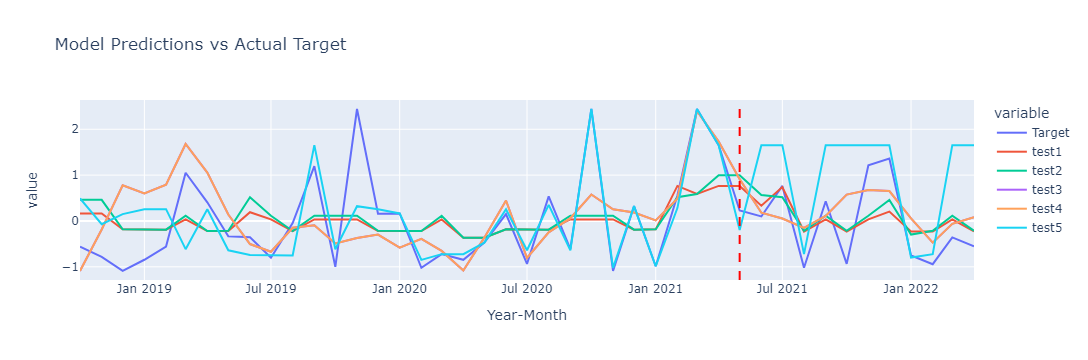

In [262]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- In our analysis, we conducted a lot of tests: test overfitting. Overfitting occurs when a model learns noise present in the training data rather than the underlying pattern, potentially leading to poor generalization on unseen data. This could pose significant challenges, as it may result in inflated performance metrics during training but poor performance when applied to new data. To address this, simplifying the approach and eliminating redundant data show up as essential. 

- By doing so, we reach `Test 2' as the best one for P1`, althoug its has a more moderate nature compared to the target variable, it has a good performance (keeps up with the movement) during the forecast phase.

- Among the models evaluated, the `AdaBoostRegressor()` emerged as the top-performing predictive multivariate model. AdaBoostRegressor is a boosting ensemble method that combines multiple weak learners, typically decision trees, to create a strong learner. It sequentially trains each weak learner, adjusting the weights of training instances based on the performance of the preceding learners. This process allows AdaBoostRegressor to focus on the observations that are difficult to classify, ultimately improving the model's predictive accuracy.

The feature selection of the model included:
- `['ITA_M&E_Ship lag10', 'GBR_M&E_Prod lag1', 'GBR_Prod_Index_Elect lag1']`

#### Forecast P9: 10 months

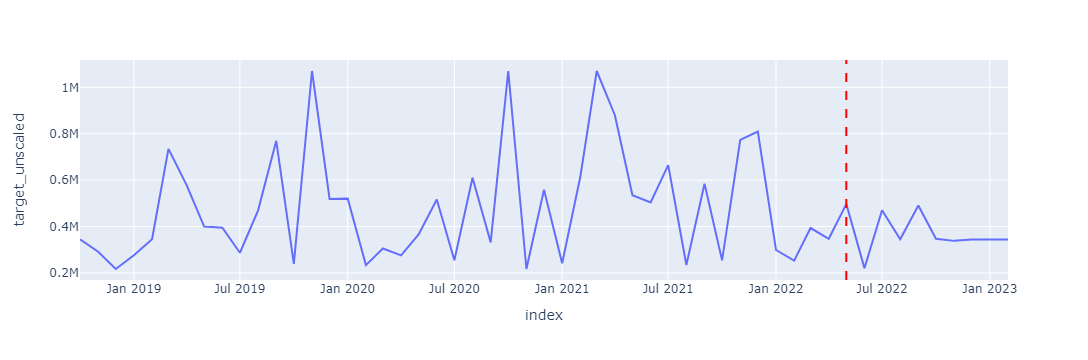

In [408]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model2,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product6,
                 target_var=target_var_product6,
                 combo_list=combo_list[1])

In [409]:
df_pred_final = target_unscaled_values

In [410]:
df_pred_final9 = df_pred_final.rename(columns={'target_unscaled': 'P9'})

<a id = "P11"></a>

### P11 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [411]:
final_df_lag['Target'] = sales_df['P11']

In [412]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product11 = final_df_lag['Target'].mean()
target_var_product11 = final_df_lag['Target'].var()

In [413]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [414]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [415]:
Thershold = 1.07

In [416]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
JPN_M&E_Ship lag6,0.99
JPN_Prod_Index_Elect lag6,1.02
JPN_M&E_Prod lag6,1.03
JPN_Prod_Index_M&E lag6,1.04
ITA_M&E_Ship lag9,1.05
GBR_Prod_Index_Elect lag6,1.07
CHN_M&E_Ship lag9,1.07
CHN_M&E_Prod lag9,1.07


In [417]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 218


In [ ]:
# rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [ ]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(8)

In [418]:
combo_list = [['CHN_M&E_Ship lag9', 'JPN_Prod_Index_Elect lag6'],
              ['CHN_M&E_Prod lag9', 'CHN_M&E_Ship lag9', 'JPN_Prod_Index_Elect lag6'],
              ['CHN_M&E_Prod lag9', 'JPN_Prod_Index_Elect lag6'],
              ['JPN_M&E_Prod lag6', 'JPN_M&E_Ship lag6', 'JPN_Prod_Index_Elect lag6'],
              ['JPN_M&E_Prod lag6', 'JPN_Prod_Index_Elect lag6']]

In [419]:
# we change the model acording to the test_results
model1 = XGBRegressor()
model2 = XGBRegressor()
model3 = XGBRegressor()
model4 = BaggingRegressor()
model5 = BaggingRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [420]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

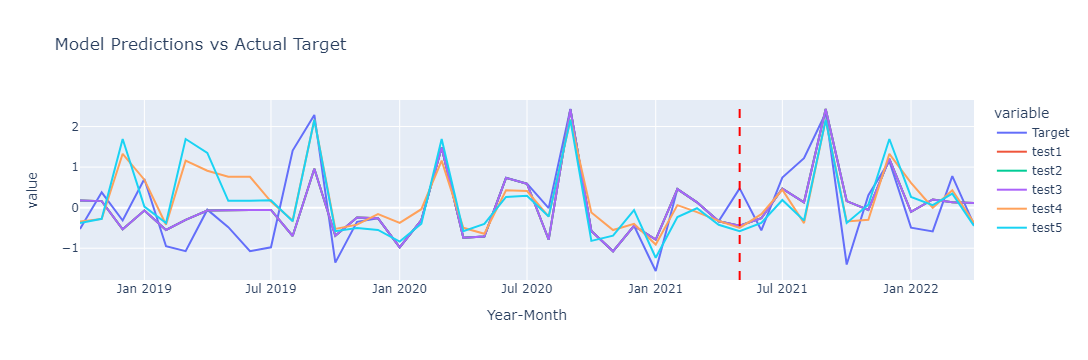

In [421]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### <u style="color:steelblue">Performance</u>

- In this analysis we will have to be very careful with overfitting. Overfitting occurs when a model learns noise present in the training data rather than the underlying pattern, potentially leading to poor generalization on unseen data. This could pose significant challenges, as it may result in inflated performance metrics during training but poor performance when applied to new data. To address this, simplifying the approach and eliminating redundant data show up as essential. 

- All the tests made are prone to overfit being the `Test 5` the one that gives more guarantees of achieving more moderate results performing better in forecast
- The `BaggingRegressor()` is the most robust predictive model due to it's abblity to reduce overfitting and enhanced generalization. BaggingRegressor is an ensemble learning method that aggregates predictions from multiple estimators to improve stability and accuracy. It uses bootstrap sampling to train each base estimator on different subsets of the training data.

The feature selection of the model included:
- `['JPN_M&E_Prod lag6', 'JPN_Prod_Index_Elect lag6']`

#### Forecast P11: 10 months

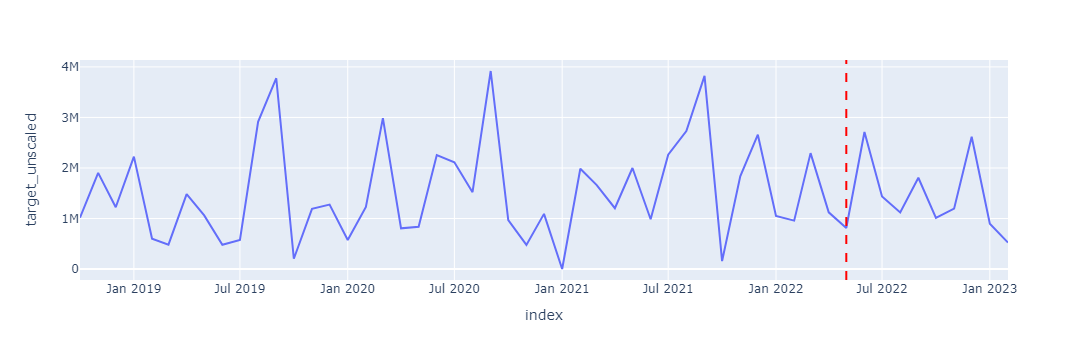

In [422]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model5,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product11,
                 target_var=target_var_product11,
                 combo_list=combo_list[4])

In [423]:
df_pred_final = target_unscaled_values
df_pred_final11 = df_pred_final.rename(columns={'target_unscaled': 'P11'})

<a id = "P12"></a>

### P12 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [434]:
final_df_lag['Target'] = sales_df['P12']

In [435]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product12 = final_df_lag['Target'].mean()
target_var_product12 = final_df_lag['Target'].var()

In [436]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [437]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [460]:
Thershold = 0.8

In [461]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_CPI lag1,0.78
DEU_Producer_Prices_Elect lag10,0.78
CHN_CPI,0.78
OCDE(EU)_CPI lag10,0.79


In [462]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 15


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [464]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['DEU_Producer_Prices_Elect lag10', 'CHN_CPI lag1']ExtraTreeRegressor",0.69
"['CHN_CPI', 'DEU_Producer_Prices_Elect lag10', 'CHN_CPI lag1', 'OCDE(EU)_CPI lag10']GradientBoostingRegressor",0.71
"['CHN_CPI', 'CHN_CPI lag1', 'OCDE(EU)_CPI lag10']GradientBoostingRegressor",0.71
"['DEU_Producer_Prices_Elect lag10', 'OCDE(EU)_CPI lag10']NuSVR",0.71
"['CHN_CPI', 'DEU_Producer_Prices_Elect lag10', 'OCDE(EU)_CPI lag10']NuSVR",0.72


In [465]:
combo_list = [['DEU_Producer_Prices_Elect lag10', 'CHN_CPI lag1'],
              ['CHN_CPI', 'DEU_Producer_Prices_Elect lag10', 'CHN_CPI lag1', 'OCDE(EU)_CPI lag10'],
              ['CHN_CPI', 'CHN_CPI lag1', 'OCDE(EU)_CPI lag10'],
              ['DEU_Producer_Prices_Elect lag10', 'OCDE(EU)_CPI lag10'],
             ['CHN_CPI', 'DEU_Producer_Prices_Elect lag10', 'OCDE(EU)_CPI lag10']]

In [470]:
# we change the model acording to the test_results
model1 = ExtraTreesRegressor()
model2 = GradientBoostingRegressor()
model3 = GradientBoostingRegressor()
model4 = NuSVR()
model5 = NuSVR()
models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [471]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

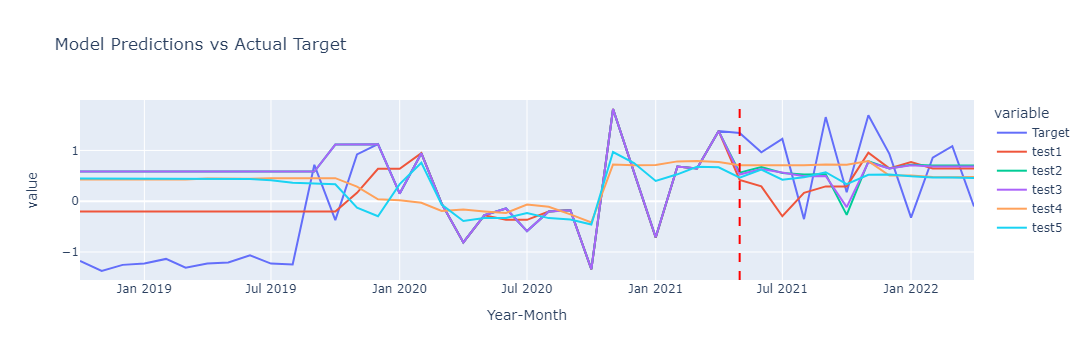

In [472]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P12: 10 months

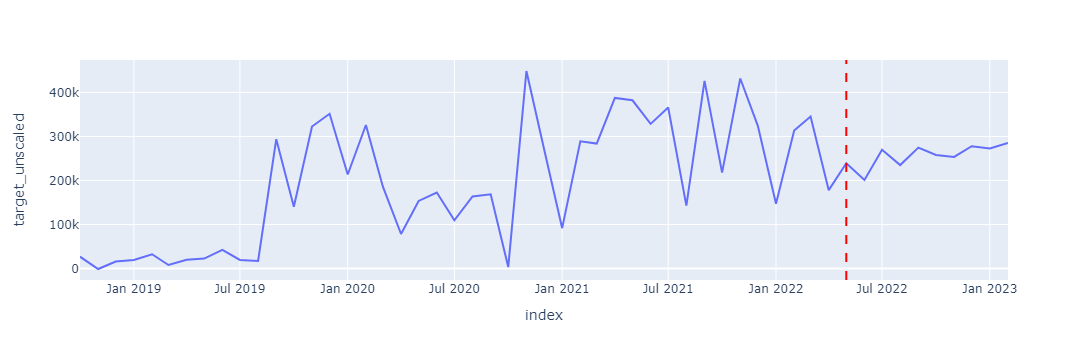

In [473]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product12,
                 target_var=target_var_product12,
                 combo_list=combo_list[2])

In [474]:
df_pred_final = target_unscaled_values

In [475]:
df_pred_final12 = df_pred_final.rename(columns={'target_unscaled': 'P12'})

<a id = "P13"></a>

### P13 Forecast

[Back to Data Modeling](#Data-Modeling)

#### 1. Defining our target 

In [490]:
final_df_lag['Target'] = sales_df['P13']

In [491]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [492]:
forecast_df = final_df_lag.copy()

#### 2. Applying the First function: Data Scaling

In [493]:
forecast_df, scaler = preprocess_data(forecast_df)

#### 3. Variable & Model selection

In [494]:
Thershold = 1.17

In [495]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
CHN_IR lag1,1.09
FRA_Unemployment_Rate lag7,1.16
FRA_IR lag9,1.16
WLD_P_Natural_Gas lag12,1.17
GBR_M&E_Prod lag1,1.17


In [496]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [498]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['WLD_P_Natural_Gas lag12', 'FRA_IR lag9']PassiveAggressiveRegressor",0.53
"['WLD_P_Natural_Gas lag12', 'CHN_IR lag1', 'FRA_IR lag9', 'FRA_Unemployment_Rate lag7']LinearSVR",0.56
"['WLD_P_Natural_Gas lag12', 'CHN_IR lag1', 'FRA_IR lag9', 'FRA_Unemployment_Rate lag7']HuberRegressor",0.58
['WLD_P_Natural_Gas lag12']AdaBoostRegressor,0.59
"['WLD_P_Natural_Gas lag12', 'CHN_IR lag1']GradientBoostingRegressor",0.60


In [500]:
combo_list = [['WLD_P_Natural_Gas lag12', 'FRA_IR lag9'],
              ['WLD_P_Natural_Gas lag12', 'CHN_IR lag1', 'FRA_IR lag9', 'FRA_Unemployment_Rate lag7'],
              ['WLD_P_Natural_Gas lag12', 'CHN_IR lag1', 'FRA_IR lag9', 'FRA_Unemployment_Rate lag7'],
              ['WLD_P_Natural_Gas lag12'],
              ['WLD_P_Natural_Gas lag12', 'CHN_IR lag1']]

In [505]:
model1 = PassiveAggressiveRegressor()
model2 = LinearSVR()
model3 = HuberRegressor()
model4 = AdaBoostRegressor()
model5 = GradientBoostingRegressor()

models = [model1, model2, model3, model4, model5]

#### 4. Training our model

In [506]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

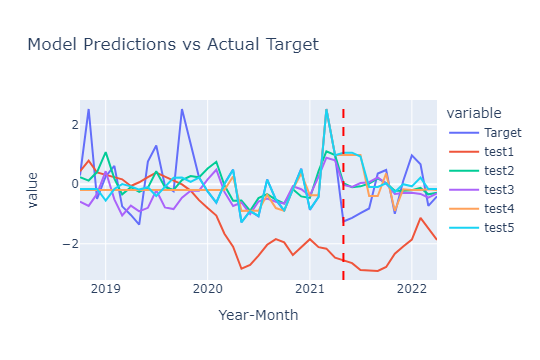

In [507]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P13: 10 months

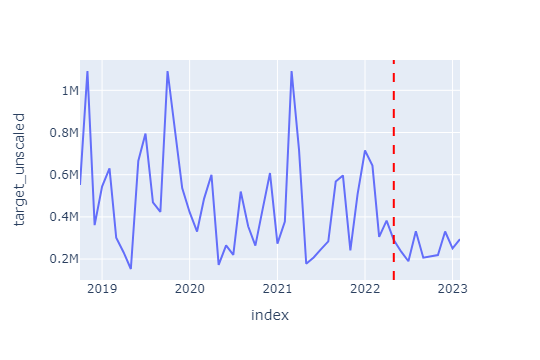

In [508]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model2,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product6,
                 target_var=target_var_product6,
                 combo_list=combo_list[1])

In [509]:
df_pred_final = target_unscaled_values

In [510]:
df_pred_final13 = df_pred_final.rename(columns={'target_unscaled': 'P13'})

<a id = "P14"></a>

### P14 Forecast

[Back to Data Modeling](#Data-Modeling)

In [573]:
#### 1. Defining our target 

In [574]:
final_df_lag['Target'] = sales_df['P14']

In [575]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [576]:
forecast_df = final_df_lag.copy()

In [577]:
#### 2. Applying the First function: Data Scaling

In [578]:
forecast_df, scaler = preprocess_data(forecast_df)

In [579]:
#### 3. Variable & Model selection

In [580]:
Thershold = 1.134

In [581]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
ITA_M&E_Ship lag12,1.11
ITA_Prod_Index_Elect lag8,1.12
ITA_Prod_Index_M&E lag12,1.12
ITA_M&E_Prod lag12,1.12
ITA_Prod_Index_Elect lag12,1.13


In [582]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [584]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['ITA_M&E_Prod lag12', 'ITA_Prod_Index_M&E lag12']XGBRegressor",0.96
['ITA_M&E_Prod lag12']XGBRegressor,0.97
"['ITA_M&E_Prod lag12', 'ITA_Prod_Index_M&E lag12', 'ITA_Prod_Index_Elect lag12']XGBRegressor",0.99
"['ITA_M&E_Prod lag12', 'ITA_Prod_Index_Elect lag12']GradientBoostingRegressor",0.99
"['ITA_M&E_Prod lag12', 'ITA_M&E_Ship lag12', 'ITA_Prod_Index_Elect lag8']DecisionTreeRegressor",1.00


In [585]:
combo_list = [['ITA_M&E_Prod lag12', 'ITA_Prod_Index_M&E lag12'],
              ['ITA_M&E_Prod lag12'],
              ['ITA_M&E_Prod lag12', 'ITA_Prod_Index_M&E lag12', 'ITA_Prod_Index_Elect lag12'],
              ['ITA_M&E_Prod lag12', 'ITA_Prod_Index_Elect lag12'],
              ['ITA_M&E_Prod lag12', 'ITA_M&E_Ship lag12', 'ITA_Prod_Index_Elect lag8']]

In [586]:
model1 = XGBRegressor()
model2 = XGBRegressor()
model3 = XGBRegressor()
model4 = GradientBoostingRegressor()
model5 = DecisionTreeRegressor()

models = [model1, model2, model3, model4, model5]

In [587]:
#### 4. Training our model

In [588]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

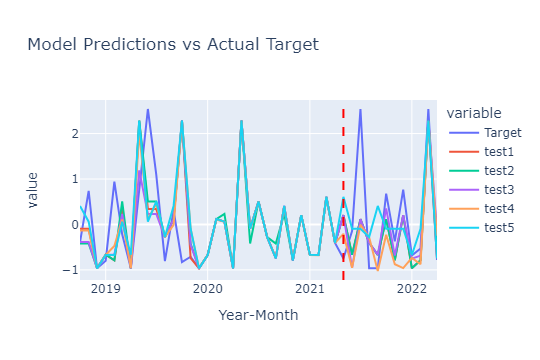

In [589]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P14: 10 months

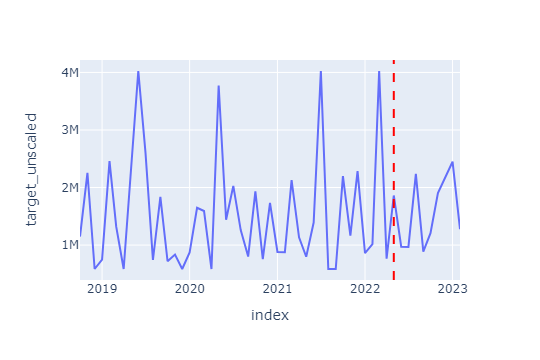

In [590]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product11,
                 target_var=target_var_product11,
                 combo_list=combo_list[2])

In [591]:
df_pred_final = target_unscaled_values
df_pred_final14 = df_pred_final.rename(columns={'target_unscaled': 'P14'})

<a id = "P16"></a>

### P16 Forecast

[Back to Data Modeling](#Data-Modeling)

In [646]:
#### 1. Defining our target 

In [647]:
final_df_lag['Target'] = sales_df['P16']

In [648]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [649]:
forecast_df = final_df_lag.copy()

In [650]:
#### 2. Applying the First function: Data Scaling

In [651]:
forecast_df, scaler = preprocess_data(forecast_df)

In [652]:
#### 3. Variable & Model selection

In [653]:
Thershold = 0.77

In [654]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
EURO(19)_IR lag1,0.75
EURO(19)_IR,0.75
IND_CPI lag4,0.75
EURO(19)_IR lag2,0.75
IND_CPI lag5,0.77


In [655]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [656]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [658]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['EURO(19)_IR', 'EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5']LinearSVR",0.44
"['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4']Lars",0.44
"['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4']LinearRegression",0.44
"['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5']TransformedTargetRegressor",0.45
"['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5']LinearRegression",0.45


In [659]:
combo_list = [['EURO(19)_IR', 'EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5'],
              ['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4'],
              ['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4'],
              ['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5'],
              ['EURO(19)_IR lag1', 'EURO(19)_IR lag2', 'IND_CPI lag4', 'IND_CPI lag5']]

In [660]:
model1 = LinearSVR()
model2 = Lars()
model3 = LinearRegression()
model4 = TransformedTargetRegressor()
model5 = LinearRegression()

models = [model1, model2, model3, model4, model5]

In [661]:
#### 4. Training our model

In [662]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

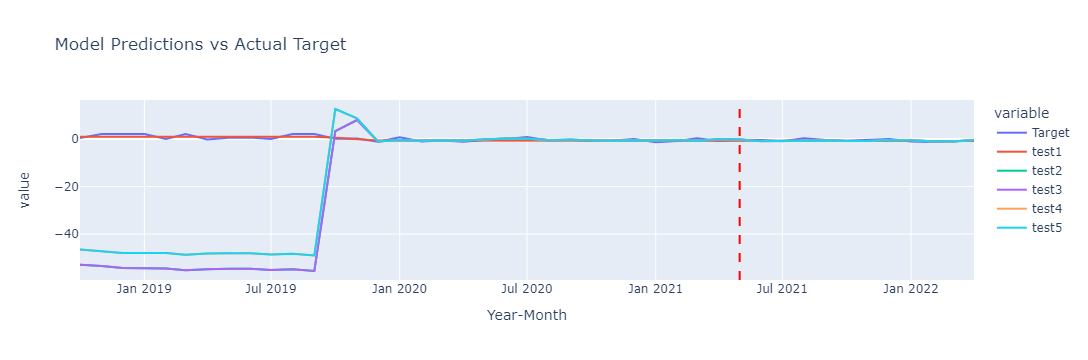

In [663]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P16: 10 months

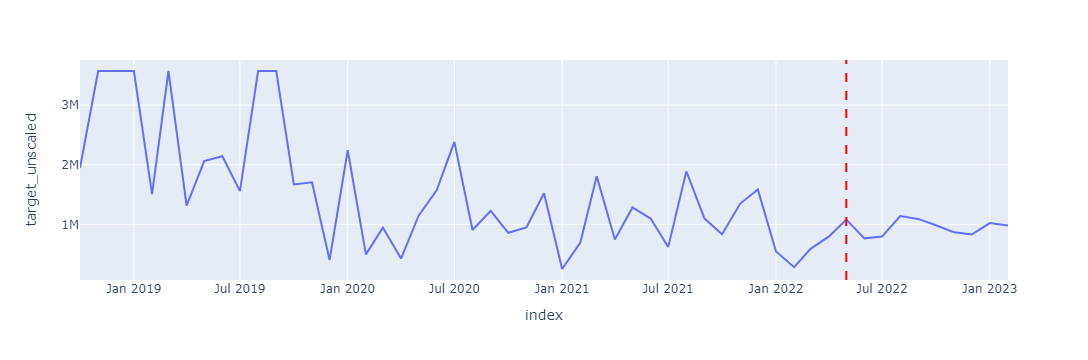

In [664]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product11,
                 target_var=target_var_product11,
                 combo_list=combo_list[2])

In [665]:
df_pred_final = target_unscaled_values
df_pred_final16 = df_pred_final.rename(columns={'target_unscaled': 'P16'})

<a id = "P20"></a>

### P20 Forecast

[Back to Data Modeling](#Data-Modeling)

In [704]:
#### 1. Defining our target 

In [705]:
final_df_lag['Target'] = sales_df['P20']

In [706]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [707]:
forecast_df = final_df_lag.copy()

In [708]:
#### 2. Applying the First function: Data Scaling

In [709]:
forecast_df, scaler = preprocess_data(forecast_df)

In [710]:
#### 3. Variable & Model selection

In [711]:
Thershold = 1.10

In [712]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
USA_CPI lag2,1.05
FRA_CConfidence lag11,1.07
FRA_CConfidence lag10,1.08
DEU_Prod_Index_Elect lag1,1.08
RUS_CONFLICT lag2,1.09


In [713]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [765]:
# rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [ ]:
rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [715]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['USA_CPI lag2', 'FRA_CConfidence lag10', 'FRA_CConfidence lag11', 'RUS_CONFLICT lag2']PassiveAggressiveRegressor",0.36
"['USA_CPI lag2', 'FRA_CConfidence lag11']RANSACRegressor",0.36
"['USA_CPI lag2', 'FRA_CConfidence lag10']RANSACRegressor",0.39
"['DEU_Prod_Index_Elect lag1', 'USA_CPI lag2', 'FRA_CConfidence lag11']RANSACRegressor",0.40
"['DEU_Prod_Index_Elect lag1', 'USA_CPI lag2', 'FRA_CConfidence lag10']RANSACRegressor",0.45


In [717]:
combo_list = [['USA_CPI lag2', 'FRA_CConfidence lag10', 'FRA_CConfidence lag11', 'RUS_CONFLICT lag2'],
              ['USA_CPI lag2', 'FRA_CConfidence lag11'],
              ['USA_CPI lag2', 'FRA_CConfidence lag10'],
              ['DEU_Prod_Index_Elect lag1', 'USA_CPI lag2', 'FRA_CConfidence lag11'],
              ['DEU_Prod_Index_Elect lag1', 'USA_CPI lag2', 'FRA_CConfidence lag10']]

In [718]:
model1 = LinearSVR()
model2 = Lars()
model3 = LinearRegression()
model4 = TransformedTargetRegressor()
model5 = LinearRegression()

models = [model1, model2, model3, model4, model5]

In [719]:
#### 4. Training our model

In [720]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

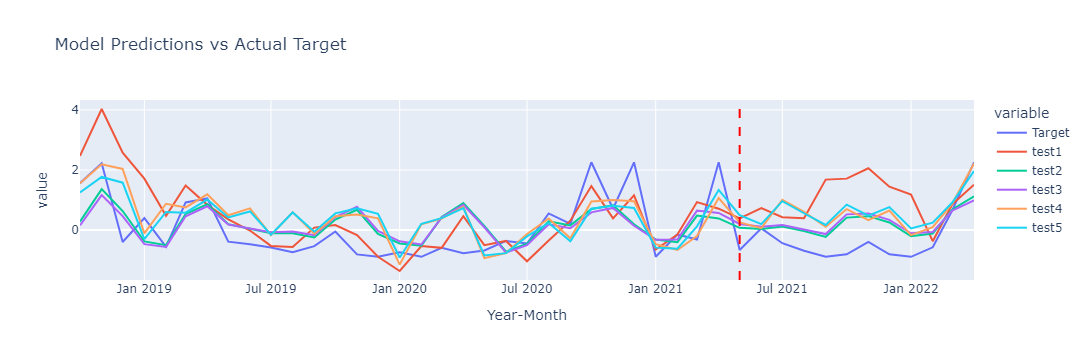

In [721]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P20: 10 months

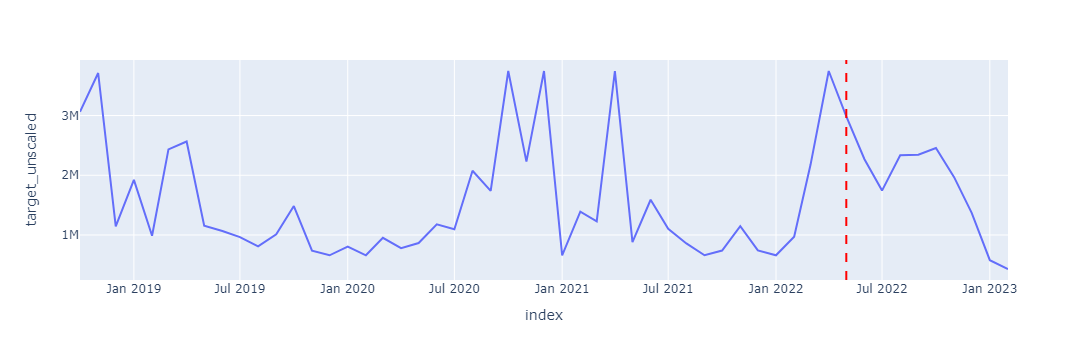

In [722]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product11,
                 target_var=target_var_product11,
                 combo_list=combo_list[2])

In [723]:
df_pred_final = target_unscaled_values
df_pred_final20 = df_pred_final.rename(columns={'target_unscaled': 'P20'})

<a id = "P36"></a>

### P36 Forecast

[Back to Data Modeling](#Data-Modeling)

In [745]:
#### 1. Defining our target 

In [746]:
final_df_lag['Target'] = sales_df['P36']

In [747]:
# the mean and var are going to be used to unscale the sales of the target variable
target_mean_product9 = final_df_lag['Target'].mean()
target_var_product9 = final_df_lag['Target'].var()

In [748]:
forecast_df = final_df_lag.copy()

In [749]:
#### 2. Applying the First function: Data Scaling

In [750]:
forecast_df, scaler = preprocess_data(forecast_df)

In [751]:
#### 3. Variable & Model selection

In [752]:
Thershold = 1.20

In [753]:
rmse_df = calculate_rmse_df(forecast_df, forecast_df['Target'])
rmse_df[rmse_df['RMSE'] <= Thershold].iloc[1:]

,RMSE
ITA_M&E_Ship lag9,1.15
SIESTOCK_%VAR lag12,1.16
GBR_Prod_Index_Elect lag9,1.18
CHN_M&E_Prod lag6,1.20
CHN_M&E_Ship lag6,1.20


In [754]:
selected_combos, selections_number = combo_selection(forecast_df)

Total number of iterations: 31


In [ ]:
#rmse_results, index_results = run_feature_selection(forecast_df, selected_combos)

In [756]:
test_results = pd.DataFrame(rmse_results)
test_results.columns = ['RMSE']
test_results.index = index_results
test_results.sort_values('RMSE').head(5)

,RMSE
"['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6']ExtraTreeRegressor",0.91
"['CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12']RANSACRegressor",0.97
"['CHN_M&E_Prod lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12']RANSACRegressor",0.97
"['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12']PassiveAggressiveRegressor",0.98
"['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12']RANSACRegressor",0.98


In [757]:
combo_list = [['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6'],
              ['CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12'],
              ['CHN_M&E_Prod lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12'],
              ['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12'],
              ['CHN_M&E_Prod lag6', 'CHN_M&E_Ship lag6', 'GBR_Prod_Index_Elect lag9', 'SIESTOCK_%VAR lag12']]

In [759]:
model1 = ExtraTreesRegressor()
model2 = RANSACRegressor()
model3 = RANSACRegressor()
model4 = PassiveAggressiveRegressor()
model5 = RANSACRegressor()

models = [model1, model2, model3, model4, model5]

In [760]:
#### 4. Training our model

In [761]:
plot_df = build_model_predictions(models, forecast_df, combo_list, months_forecast=12)

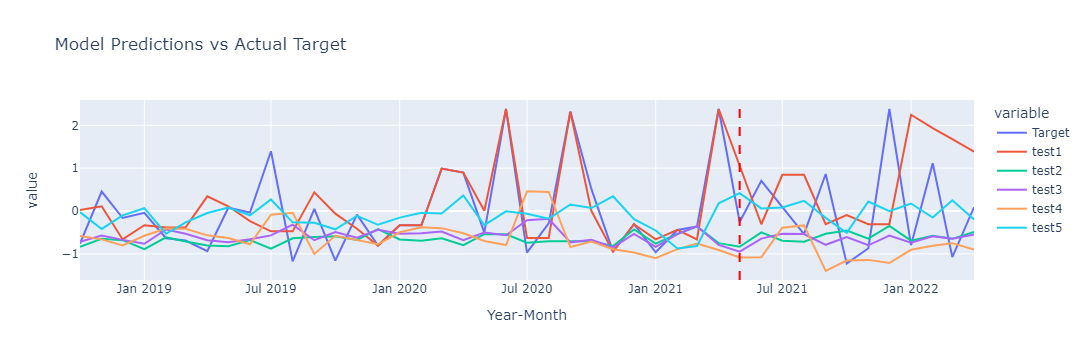

In [762]:
# Plot to compare models
fig = px.line(plot_df, x=plot_df.index, y=['Target', 'test1', 'test2', 'test3', 'test4', 'test5'], 
              title='Model Predictions vs Actual Target')

# Forecast beginning
forecast_start_date_index = len(plot_df) - 12  # as defined above

# Vertical line marking the beginning of the forecast period
fig.add_shape(
    type='line',
    x0=plot_df.index[forecast_start_date_index], y0=0, x1=plot_df.index[forecast_start_date_index], y1=1,
    line=dict(color='red', width=2, dash='dash'),
    xref='x',
    yref='paper'  
)

fig.show()

#### Forecast P36: 10 months

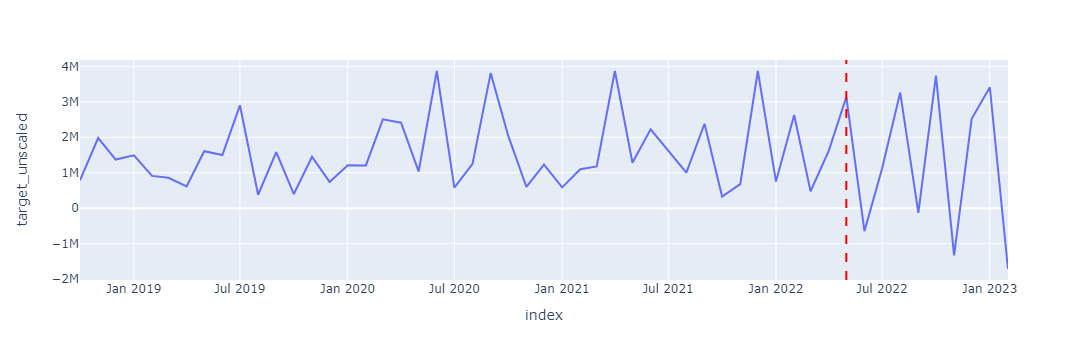

In [763]:
target_unscaled_values = make_predictions(df=forecast_df,
                 model=model3,
                 steps=10,
                 start_date='2022-05',
                 target_mean=target_mean_product11,
                 target_var=target_var_product11,
                 combo_list=combo_list[2])

In [764]:
df_pred_final = target_unscaled_values
df_pred_final36 = df_pred_final.rename(columns={'target_unscaled': 'P36'})

In [767]:
dfs_final = [df_pred_final1, df_pred_final3, df_pred_final4, df_pred_final5, df_pred_final6, df_pred_final8, df_pred_final9, df_pred_final11, df_pred_final12, df_pred_final13, df_pred_final14, df_pred_final16, df_pred_final20, df_pred_final36]  # Replace df1, df2, df3, ... with your DataFrames

merged_df_final = pd.concat(dfs_final, axis=1)

merged_df_final

,P1,P3,P4,P5,P6,P8,P9,P11,P12,P13,P14,P16,P20,P36
2018-10,36094789.89,8037740.11,37605364.83,28835526.43,34741125.12,34889252.90,344733.96,1015252.62,26747.10,551367.52,1147596.83,1945229.28,3062304.13,785767.80
2018-11,27585742.94,11855934.91,36879350.44,35464600.74,36335129.92,34453131.65,291467.56,1903179.32,-1196.06,1091549.59,2256629.72,3572287.50,3712298.63,1978133.23
2018-12,37906674.36,8692794.84,38493452.43,33375882.57,44417989.77,32593617.30,217088.41,1222495.09,15813.48,360823.03,584294.03,3572287.50,1144167.70,1372376.86
2019-01,27624951.54,10684532.83,39978333.67,34688144.02,38267108.61,33395723.06,276047.73,2224484.40,19459.53,543946.05,748930.75,3572287.50,1922787.42,1492051.92
2019-02,34773580.54,10140667.61,43709091.23,33306215.81,37394426.18,33301400.94,345327.12,599543.49,32340.93,630253.11,2458354.68,1509086.19,987332.16,909905.84
2019-03,33826138.91,11023744.35,40183457.57,38445308.86,40366493.95,34927461.85,734543.09,481708.45,7959.02,301091.20,1319931.36,3572287.50,2434104.15,856541.16
2019-04,39726641.36,12315791.54,38386915.11,32117361.48,33333810.91,33669391.69,578681.14,1483709.96,19792.69,231265.25,584294.03,1316760.35,2565724.00,612983.96
2019-05,38926972.13,12802954.55,36998781.43,37909828.19,33923469.36,32792967.07,400035.97,1060542.72,22478.84,152923.83,2319247.16,2062340.70,1154825.50,1607086.07
2019-06,39138218.95,11535638.63,31919909.05,40249393.74,33416540.45,33682584.89,395040.48,479819.73,42500.70,665322.35,4024852.58,2143136.78,1067478.86,1497707.84
2019-07,37929906.08,13432928.93,37152655.03,37660139.78,40209999.83,33290488.33,287125.90,574441.39,19292.05,794761.17,2607039.28,1558006.28,964669.19,2900717.91


In [768]:
merged_df_final.to_excel('merged_data_final.xlsx', index=True)